**Classification**

Mijozning noroziligni (customer churn) aniqlash

Biznesda eng ko'p uchraydigan muammolardan biri - mijozning kayfiyatini aniqlash hisoblanadi.

Agar tadbirkor mijoz qaytmasligini, mahsulot yoki xizmatdan foydalabmasligini oldindan bashorat qila olsa, mijozni ushlab qoloish uchun, uning fikrini o'zgartirish uchun harakat qilishi kerak.

Ushbu dataset orqali online do'kon xaridorlari ma'lumtlarini tahlil qilish orqali mijozlarni qolish -qolmasligini tahlil qilamiz

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

Datasetni o'qiymiz


In [58]:
url="https://raw.githubusercontent.com/raxmanov/kim_sia/refs/heads/main/E-Commerce-Dataset.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


Churn qiymati 0 - mijos qoladi, 1 - mijoz ketib qoladi.
Tenure - mijozni necha yil biz bilan birga ekanligi.

In [59]:
df.shape

(5630, 20)

In [60]:
pip install xlrd==2.0.1

In [61]:
#description = pd.read_csv(url, header=1)
#description

**Ma'lumotlarni tahlil qilamiz**

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

*   Qatorlar soni 5630 ta
*   Ba'zi ustunlarda qiymatlar tushib qolgan

In [63]:
df.head() # DataFramening birinchi 5 ta qatorini ko‘rsatadi.

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [64]:
df.describe() # Pandas kutubxonasidagi DataFrame uchun statistik xulosa chiqaruvchi metoddir.

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


df.describe() sonli ustunlar bo‘yicha quyidagi statistikalarni avtomatik hisoblab beradi:
*   count — nechta qiymat bor
*   mean — o‘rtacha qiymat
*   std — standart og‘ish
*   min — eng kichik qiymat
*   25% — 1-kvartil
*   50% — median (2-kvartil)
*   75% — 3-kvartil
*   max — eng katta qiymat

Biz uchun eng muhim ustun bu `Churn` ustuni, aynan shu ustun `Label` (bashorat qiluvchi) vazifani bajaradi.

Bu ustundagi qiymatlar nisbatini qaraymiz

In [65]:
df['Churn'].value_counts()
#sonini chiqarish

,count
Churn,
0,4682
1,948


In [66]:
df['Churn'].value_counts()/len(df)*100
# foizda chiqarish

,count
Churn,
0,83.161634
1,16.838366


*  4682 ta mijoz qayta xarid qilgan (ya'ni qolgan)
*  948 ta mijoz ketib qolgan

**Nisbatini chiqaramiz**

In [67]:
churn_rate = df['Churn'].value_counts()/len(df)*100

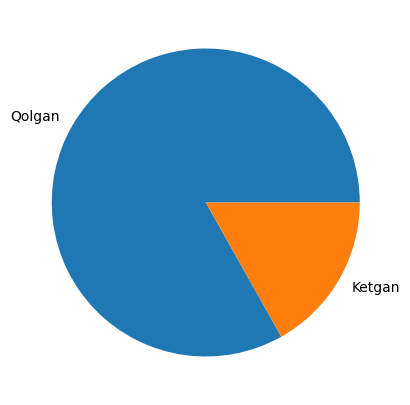

In [68]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan', 'Ketgan'])
plt.show()

Ba'zi sonli ustunlarni tahlil qilamiz

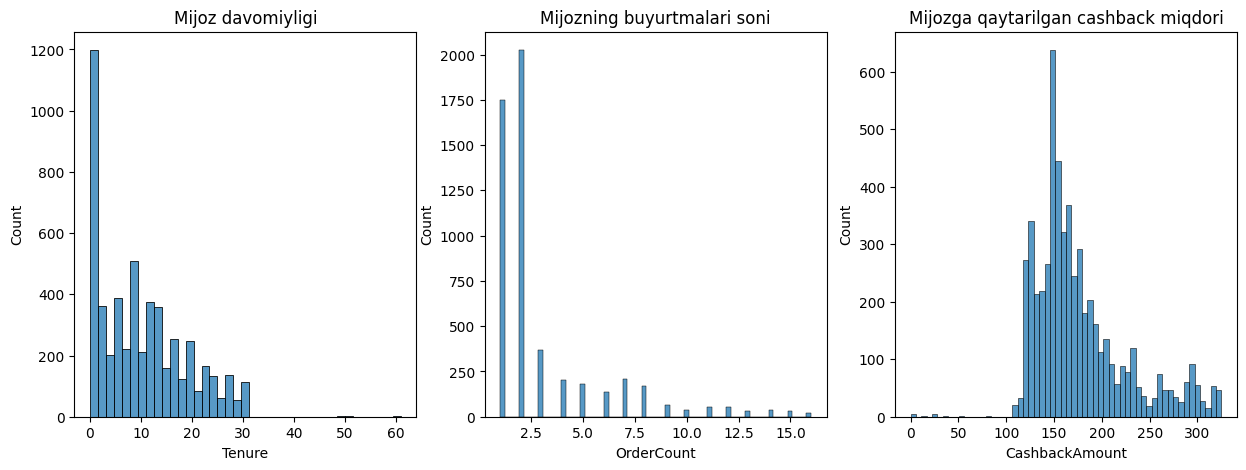

In [69]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")
# OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Mijozning buyurtmalari soni")
# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")
plt.show()


**Kategoriyali ustunlarni tahlil qilamiz**

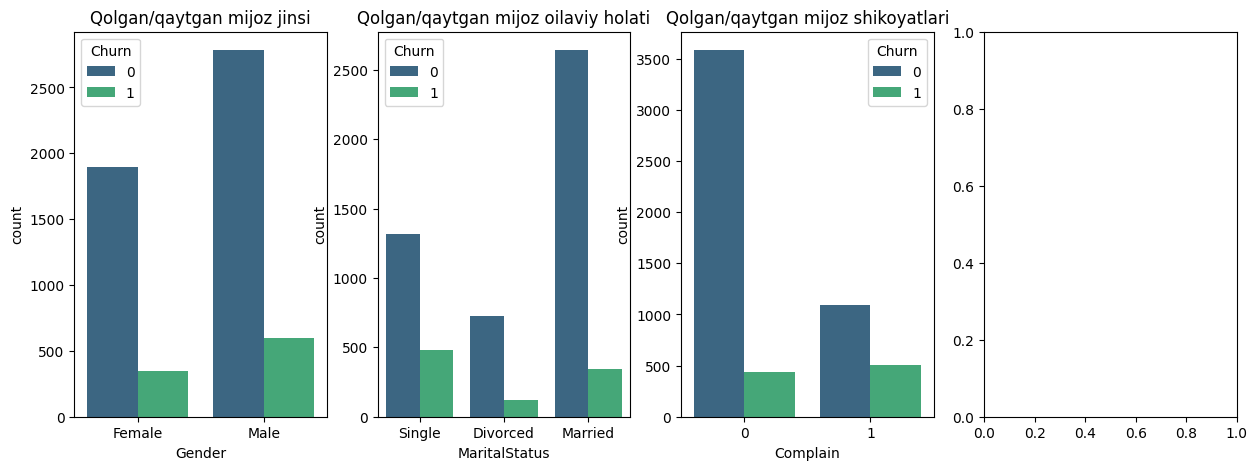

In [70]:
fig, axes = plt.subplots(1,4, figsize=(15,5))
sns.countplot(x="Gender", hue="Churn", palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan/qaytgan mijoz jinsi")

sns.countplot(x="MaritalStatus", hue="Churn", palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan/qaytgan mijoz oilaviy holati")

sns.countplot(x="Complain", hue="Churn", palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Qolgan/qaytgan mijoz shikoyatlari")

plt.show()

In [71]:
df.select_dtypes(include=np.number).corrwith(df['Churn']).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154161
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.076630
NumberOfAddress,0.043931


**Ma'lumotlarga ishlov berish**

In [72]:
# df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni:{df.isnull().sum().sum()} ")
# mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni:{missing_rows}")
# qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar soni:{np.round(missing_rows/len(df)*100)}% ")

Mavjud bo'lmagan qiymatlar soni:1856 
Mavjud bo'lmagan qatorlar soni:1856
Mavjud bo'lmagan qatorlar soni:33.0% 


33 % juda ham katta. lekin bu yerda barcha ustunlardan foydalanilayapdi.

Shuning uchun, korrelyatsiyasi yuqori bo'lgan va ba'zi katagoriyali ustunlarni saralab olamiz. (Qaysi ustunlarni tanlab olish foydalanuvchi ixtiyorida)

In [73]:
data = df[['Churn', 'Tenure', 'Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus', 'Gender']]
# Korelyatsiyasi baland bo'lgan ustunlar tanlab olindi

In [74]:
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")
# mavjud bo'lmagan qatorlar soni
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
# qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0


Demak, 10% qatorlar qiymati mavjud emas. Bu qiymatlar bilanq aday ishlash bizning datasetga bog'liq.

Shu dataset bilan ishlashda davom etamiz.

In [75]:
data = data.dropna()
data.shape

(5059, 7)

In [76]:
data['Churn'].value_counts()/len(data)

,count
Churn,
0,0.839296
1,0.160704


**ML ga tayyorgarlik**

In [77]:
from IPython.utils.py3compat import encode
# matnli ustunlarni songa aylantiramiz.
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,160,False,False,True,True,False
3,1,0.0,0,3.0,134,False,False,True,False,True
4,1,0.0,0,3.0,130,False,False,True,False,True
5,1,0.0,1,7.0,139,False,False,True,True,False
8,1,13.0,1,2.0,127,True,False,False,False,True


In [78]:
X = encoded.drop("Churn", axis = 1)
y = encoded['Churn']

In [79]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [80]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size= 0.2, stratify = y, random_state=0)

**ML**

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Model aniqligi:  0.8794466403162056


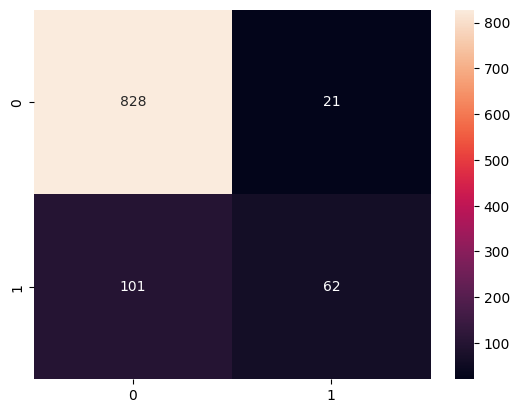

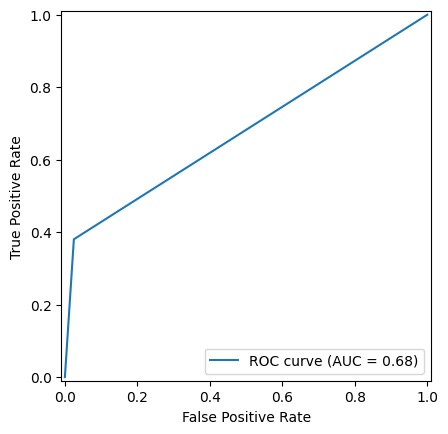

In [81]:
# Modelni yaratamiz
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))

## Confusion matrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

**Support Vector Machine**

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Model aniqligi:  0.8636363636363636


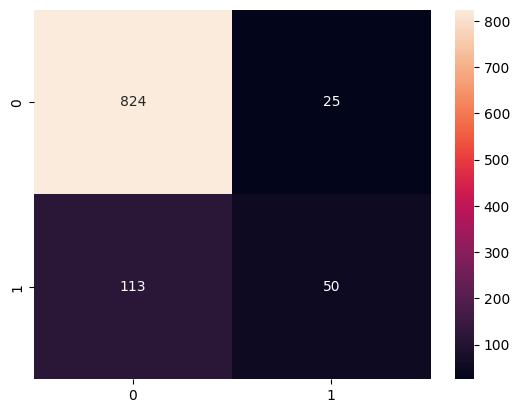

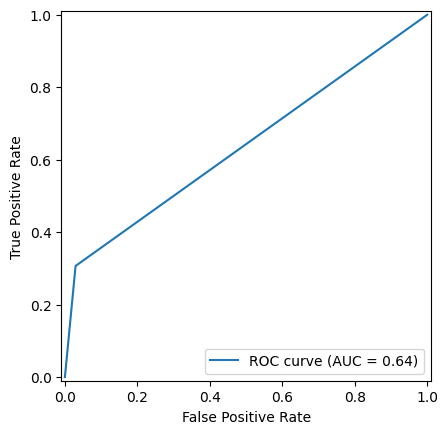

In [82]:
# Modelni yaratamiz
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat =metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

Lekin, Logistic regression va SVM ham yaxshi natija bermayapdi

**Decision Tree**

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       849
           1       0.84      0.85      0.84       163

    accuracy                           0.95      1012
   macro avg       0.90      0.91      0.91      1012
weighted avg       0.95      0.95      0.95      1012

Model aniqligi:  0.9496047430830039


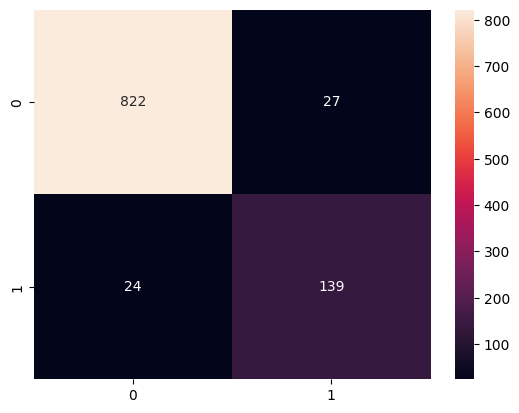

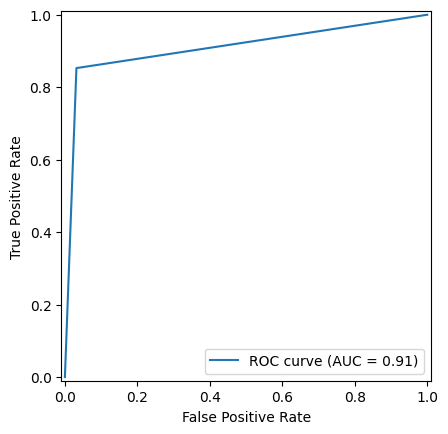

In [83]:
# Modelni yaratamiz
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat =metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

TREE ni chizib ko'ramiz

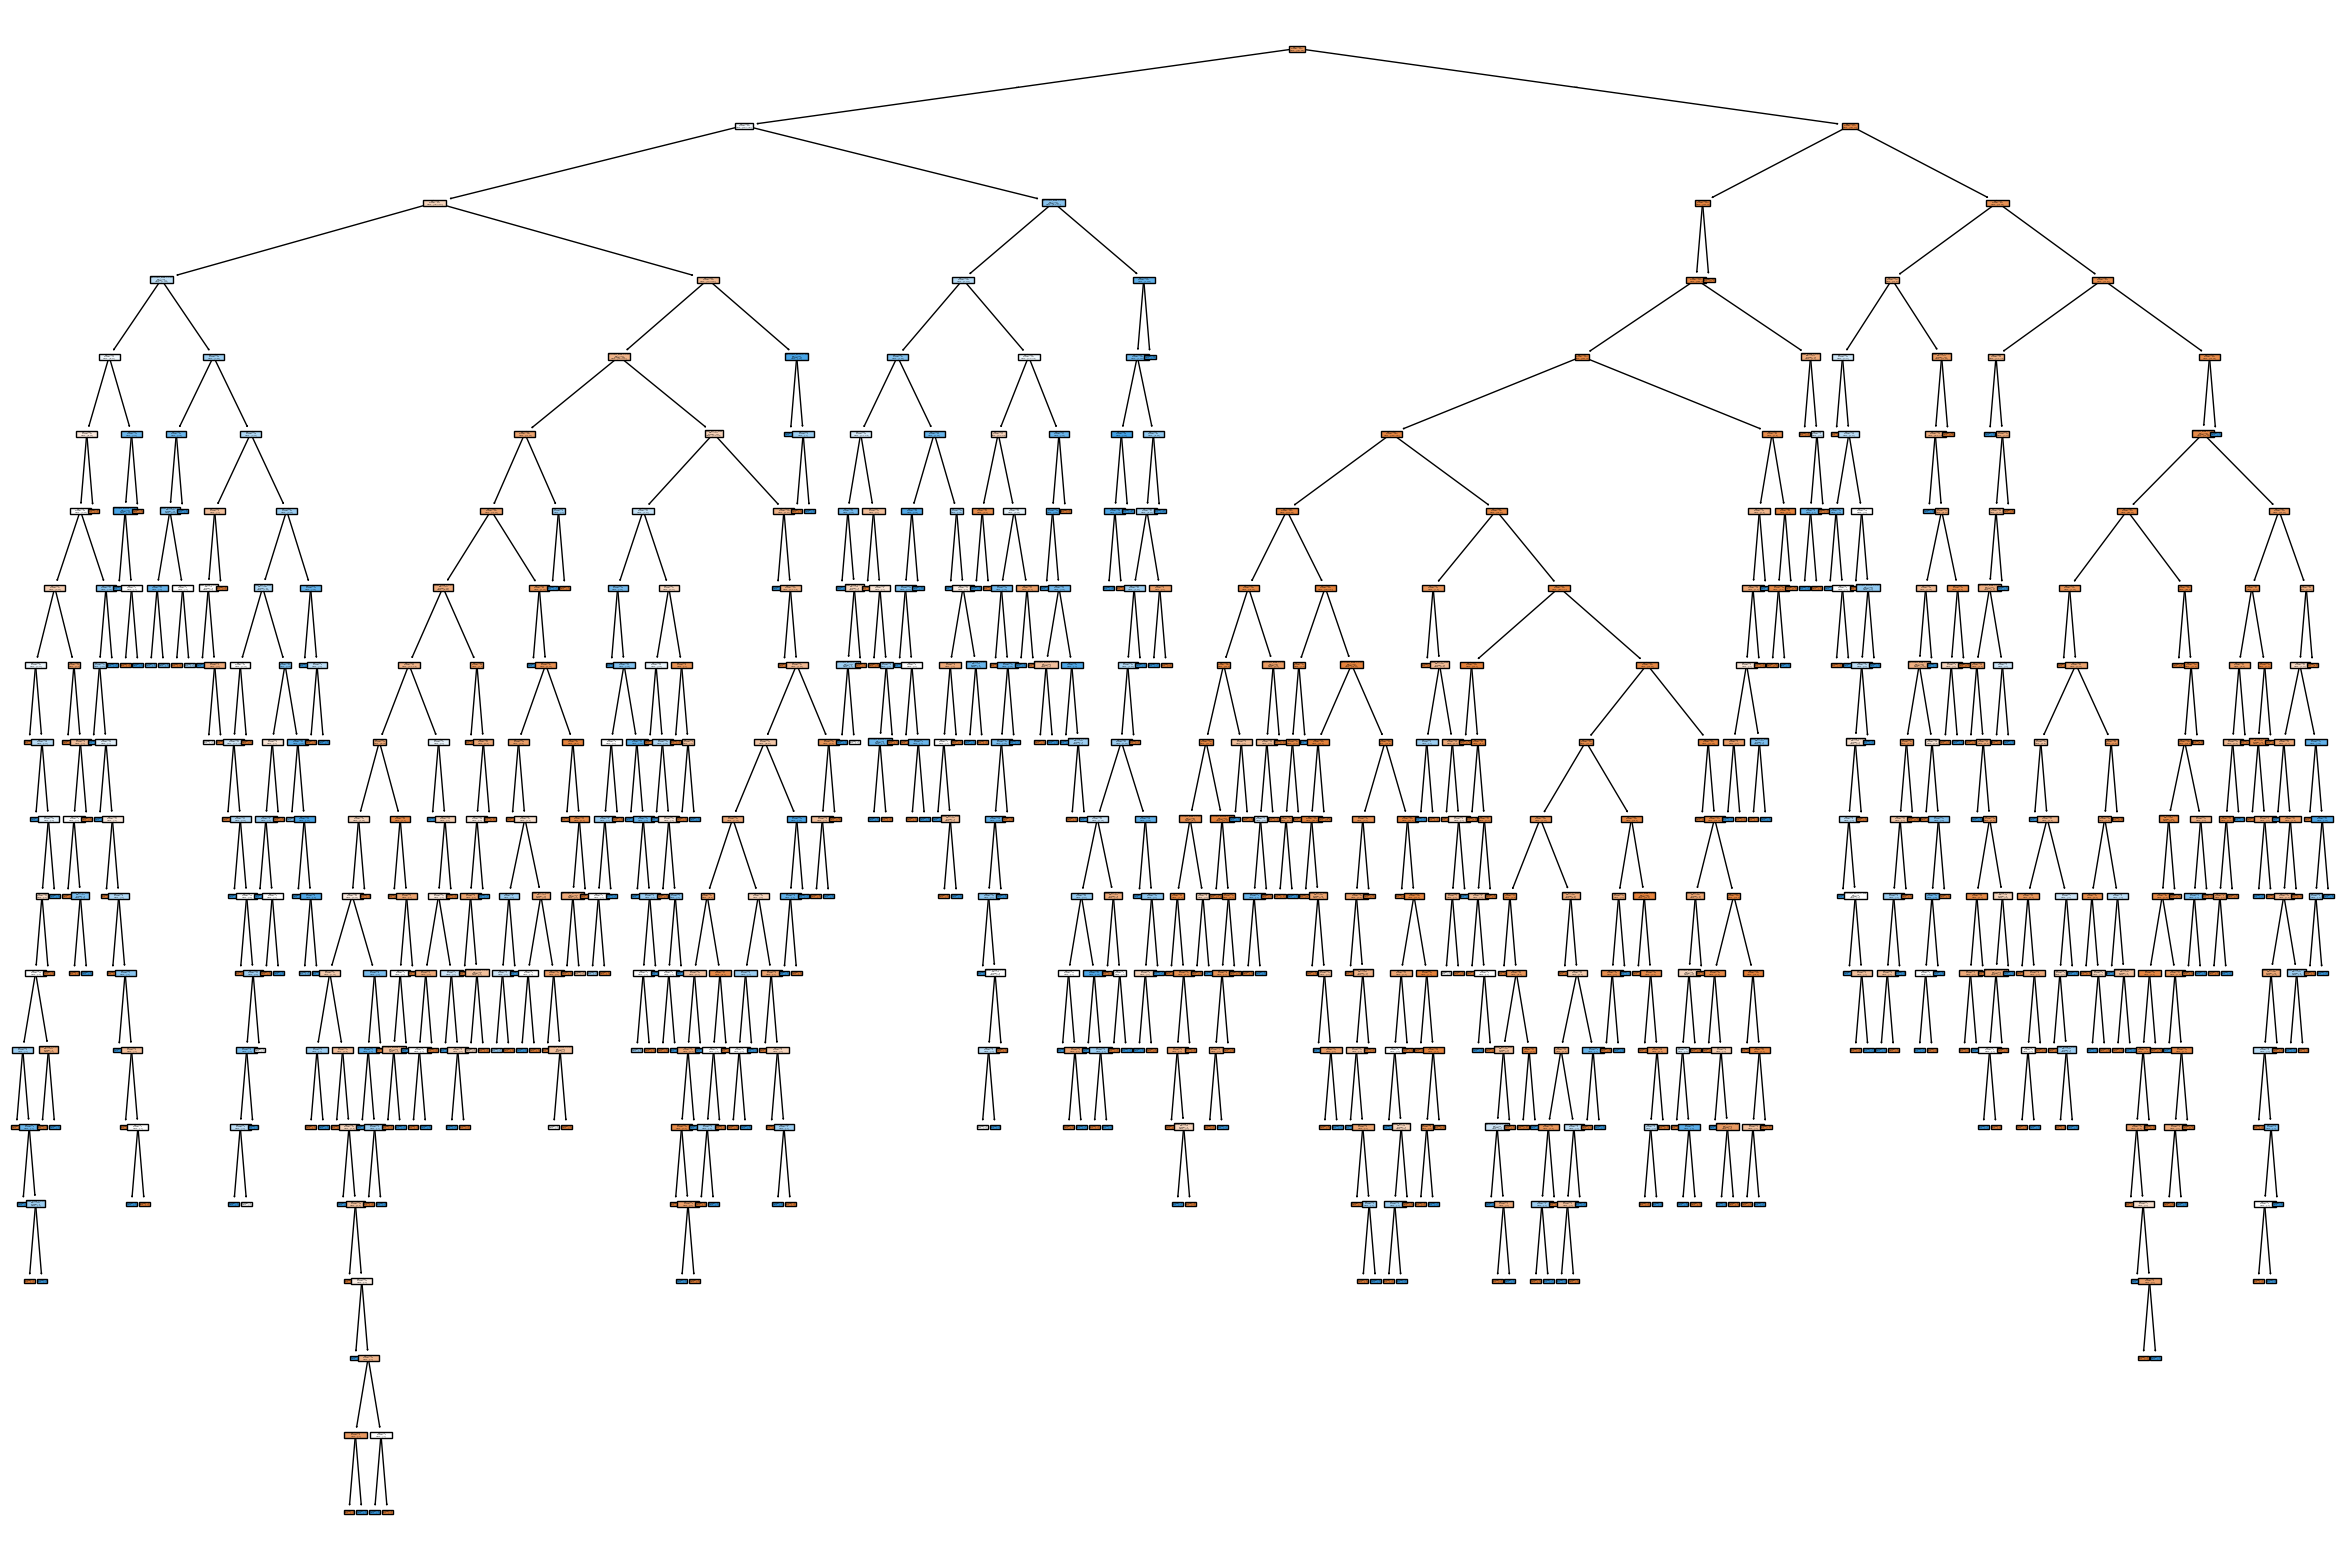

In [84]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30, 20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

Daraxtimiz kattalashib ketdi. Uni hyperparametrlardan foydalanib kamaytiramiz.

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       849
           1       0.74      0.52      0.61       163

    accuracy                           0.89      1012
   macro avg       0.83      0.74      0.77      1012
weighted avg       0.88      0.89      0.89      1012

Model aniqligi:  0.8932806324110671


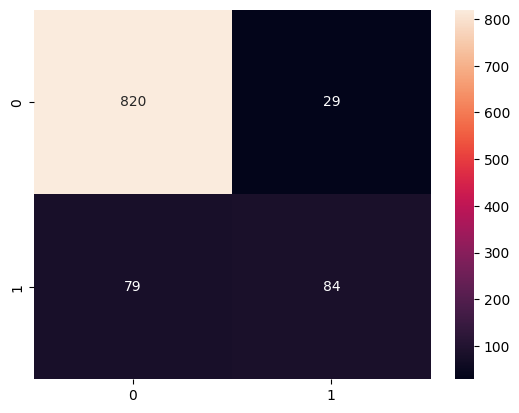

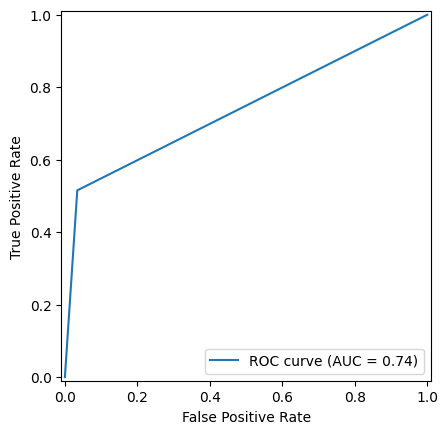

In [85]:
# Modelni yaratamiz
tree_model = DecisionTreeClassifier(max_depth=5)
#daraxtlar chuqurligini shoxlarini boshqarish mumkin
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat =metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

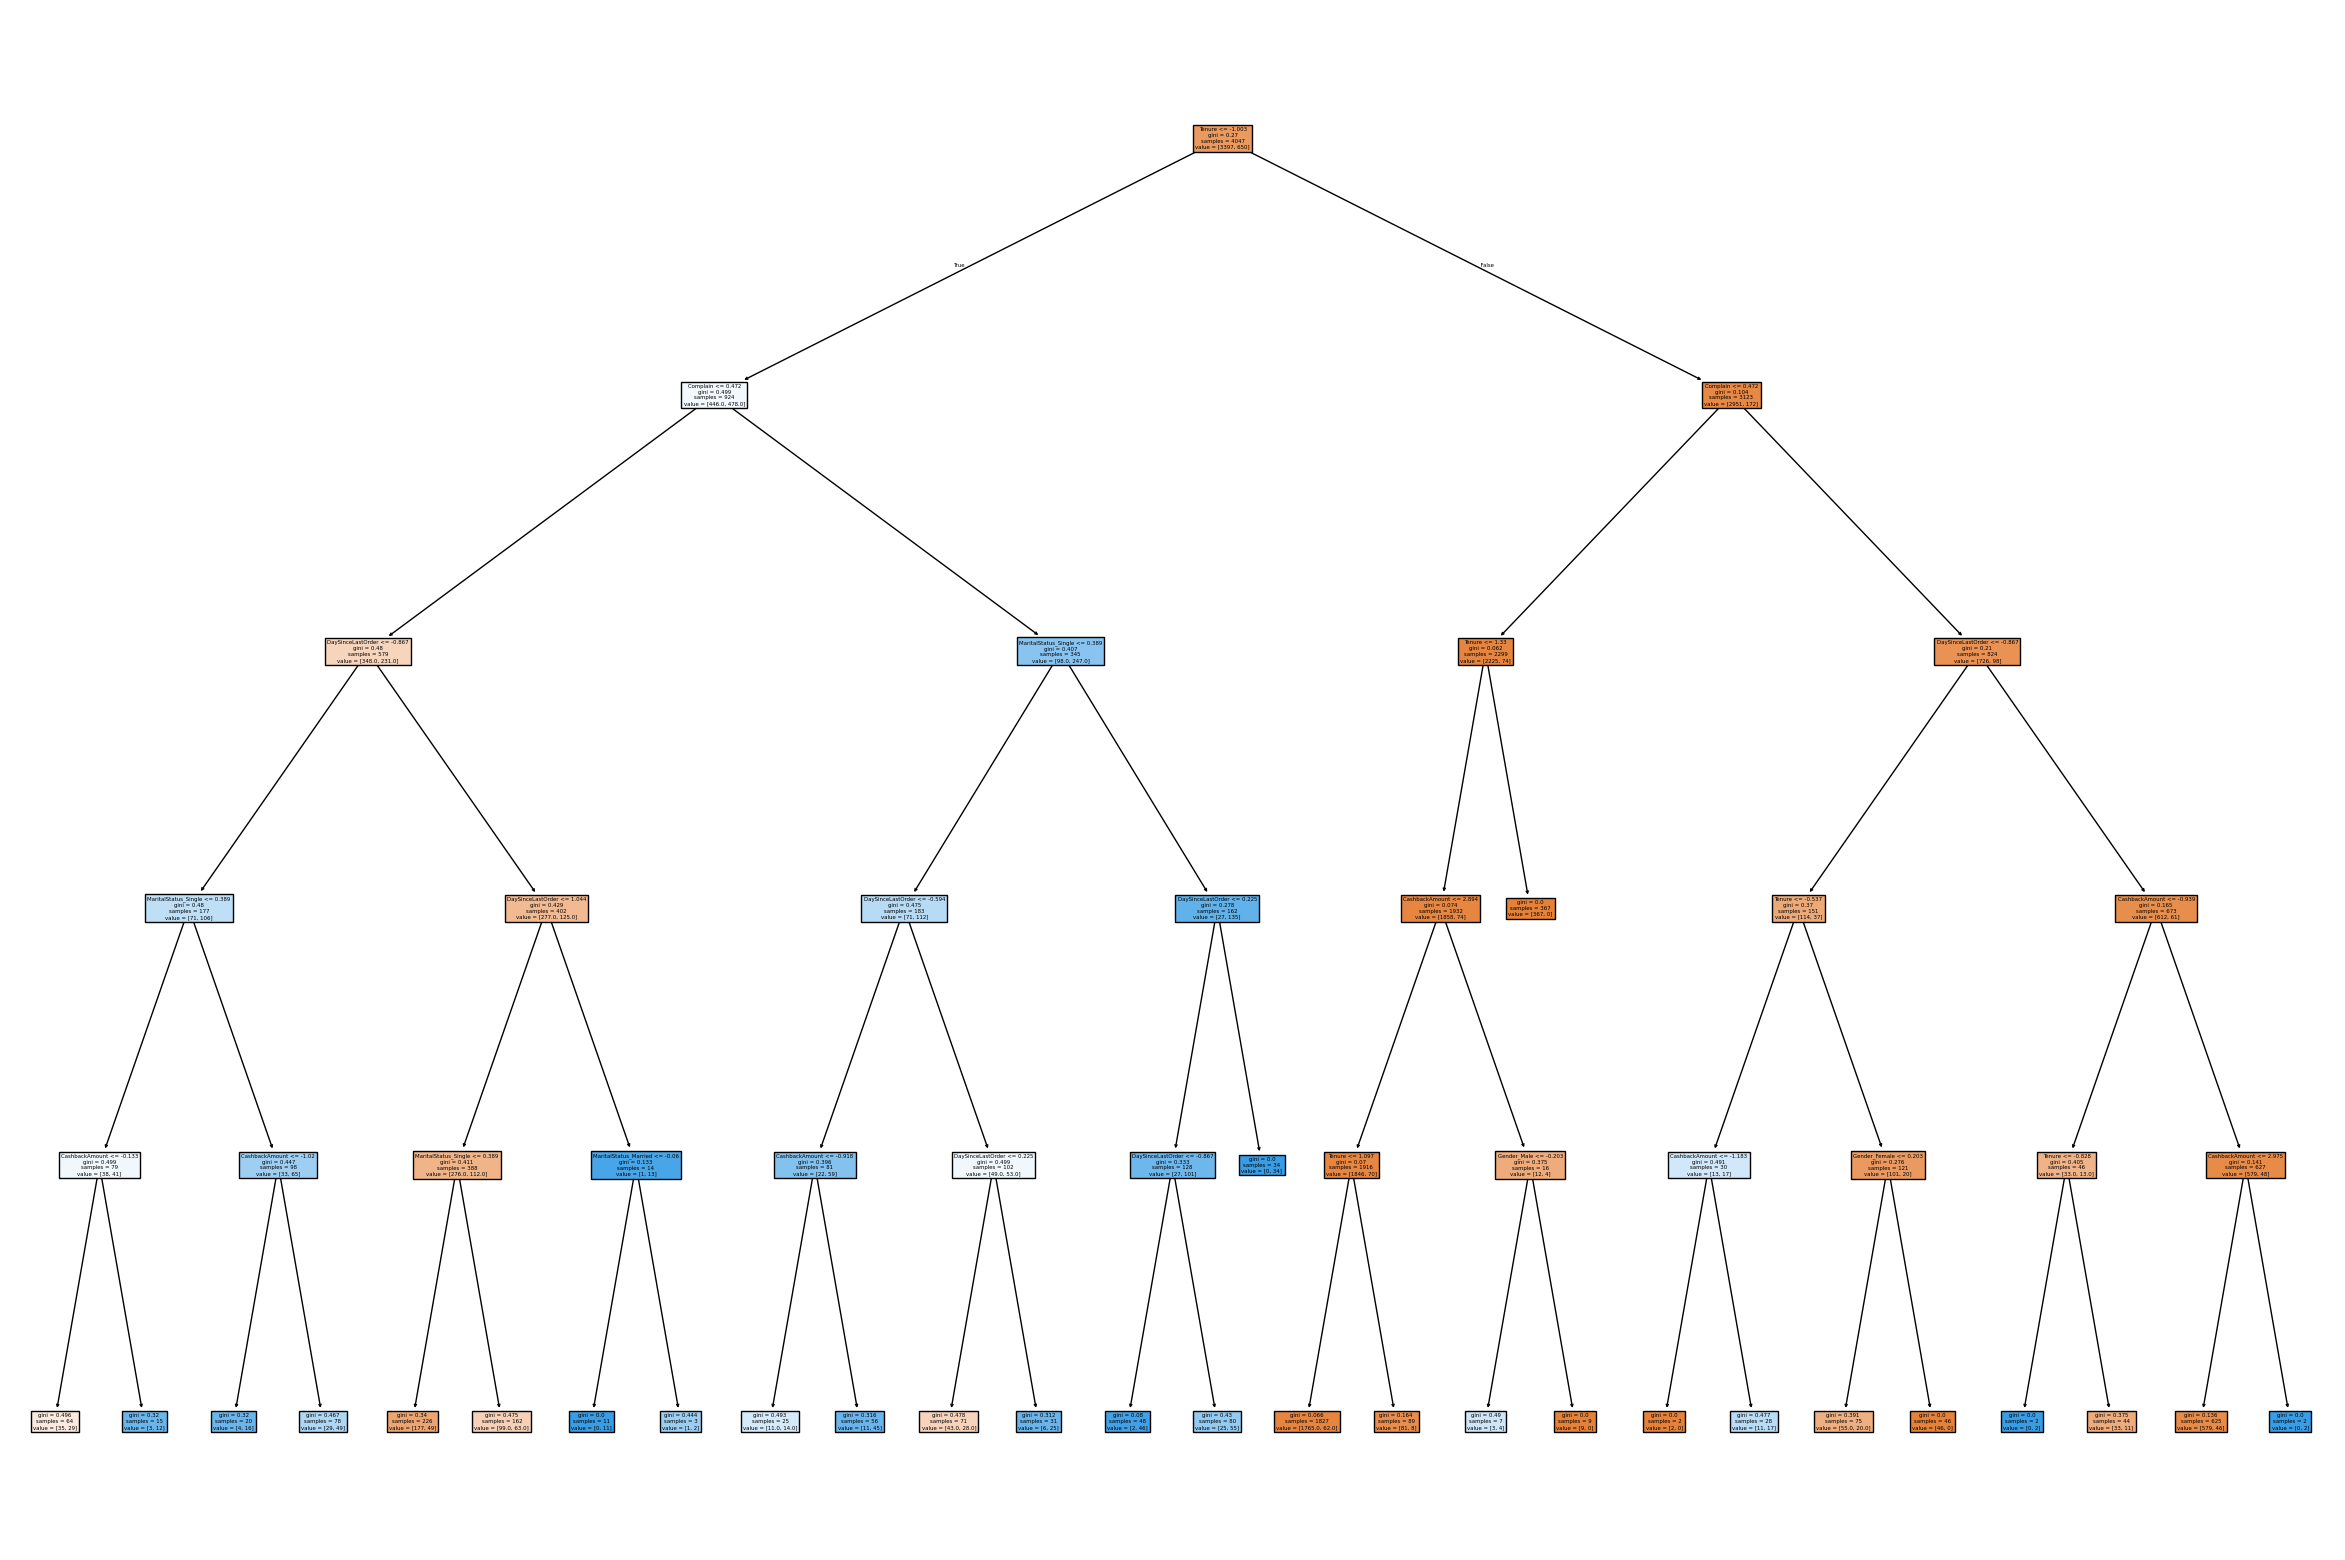

In [86]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30, 20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

aniqligimiz yaxshi emas, ya'ni 89% bo'layapdi. Bunmda albatta hyperparametrlarni optimalini topish kerak. Buning uchun Grid Search algoritmidan foydalaniladi.

In [87]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(2, 25)}
tree_model_gscv = GridSearchCV(tree_model, param_grid, cv = 5)
tree_model_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])})

In [88]:
tree_model_gscv.best_params_

{'max_depth': np.int64(22)}

Eng yaxshi parametr 21 deyapdi. Uni qo'yib ko'ramiz.

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.85      0.87      0.86       163

    accuracy                           0.95      1012
   macro avg       0.91      0.92      0.92      1012
weighted avg       0.95      0.95      0.95      1012

Model aniqligi:  0.9535573122529645


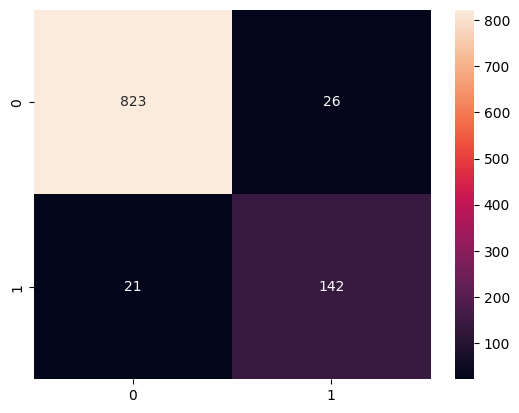

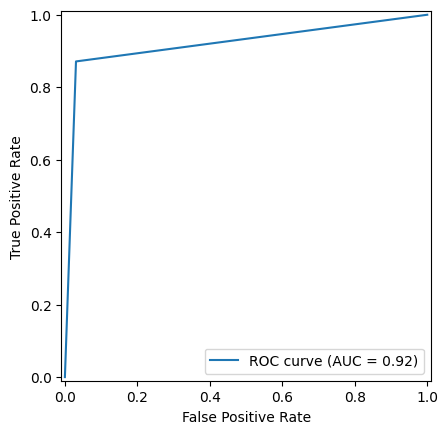

In [93]:
# Modelni yaratamiz
tree_model = DecisionTreeClassifier(max_depth=22)
#daraxtlar chuqurligini shoxlarini boshqarish mumkin
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat =metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

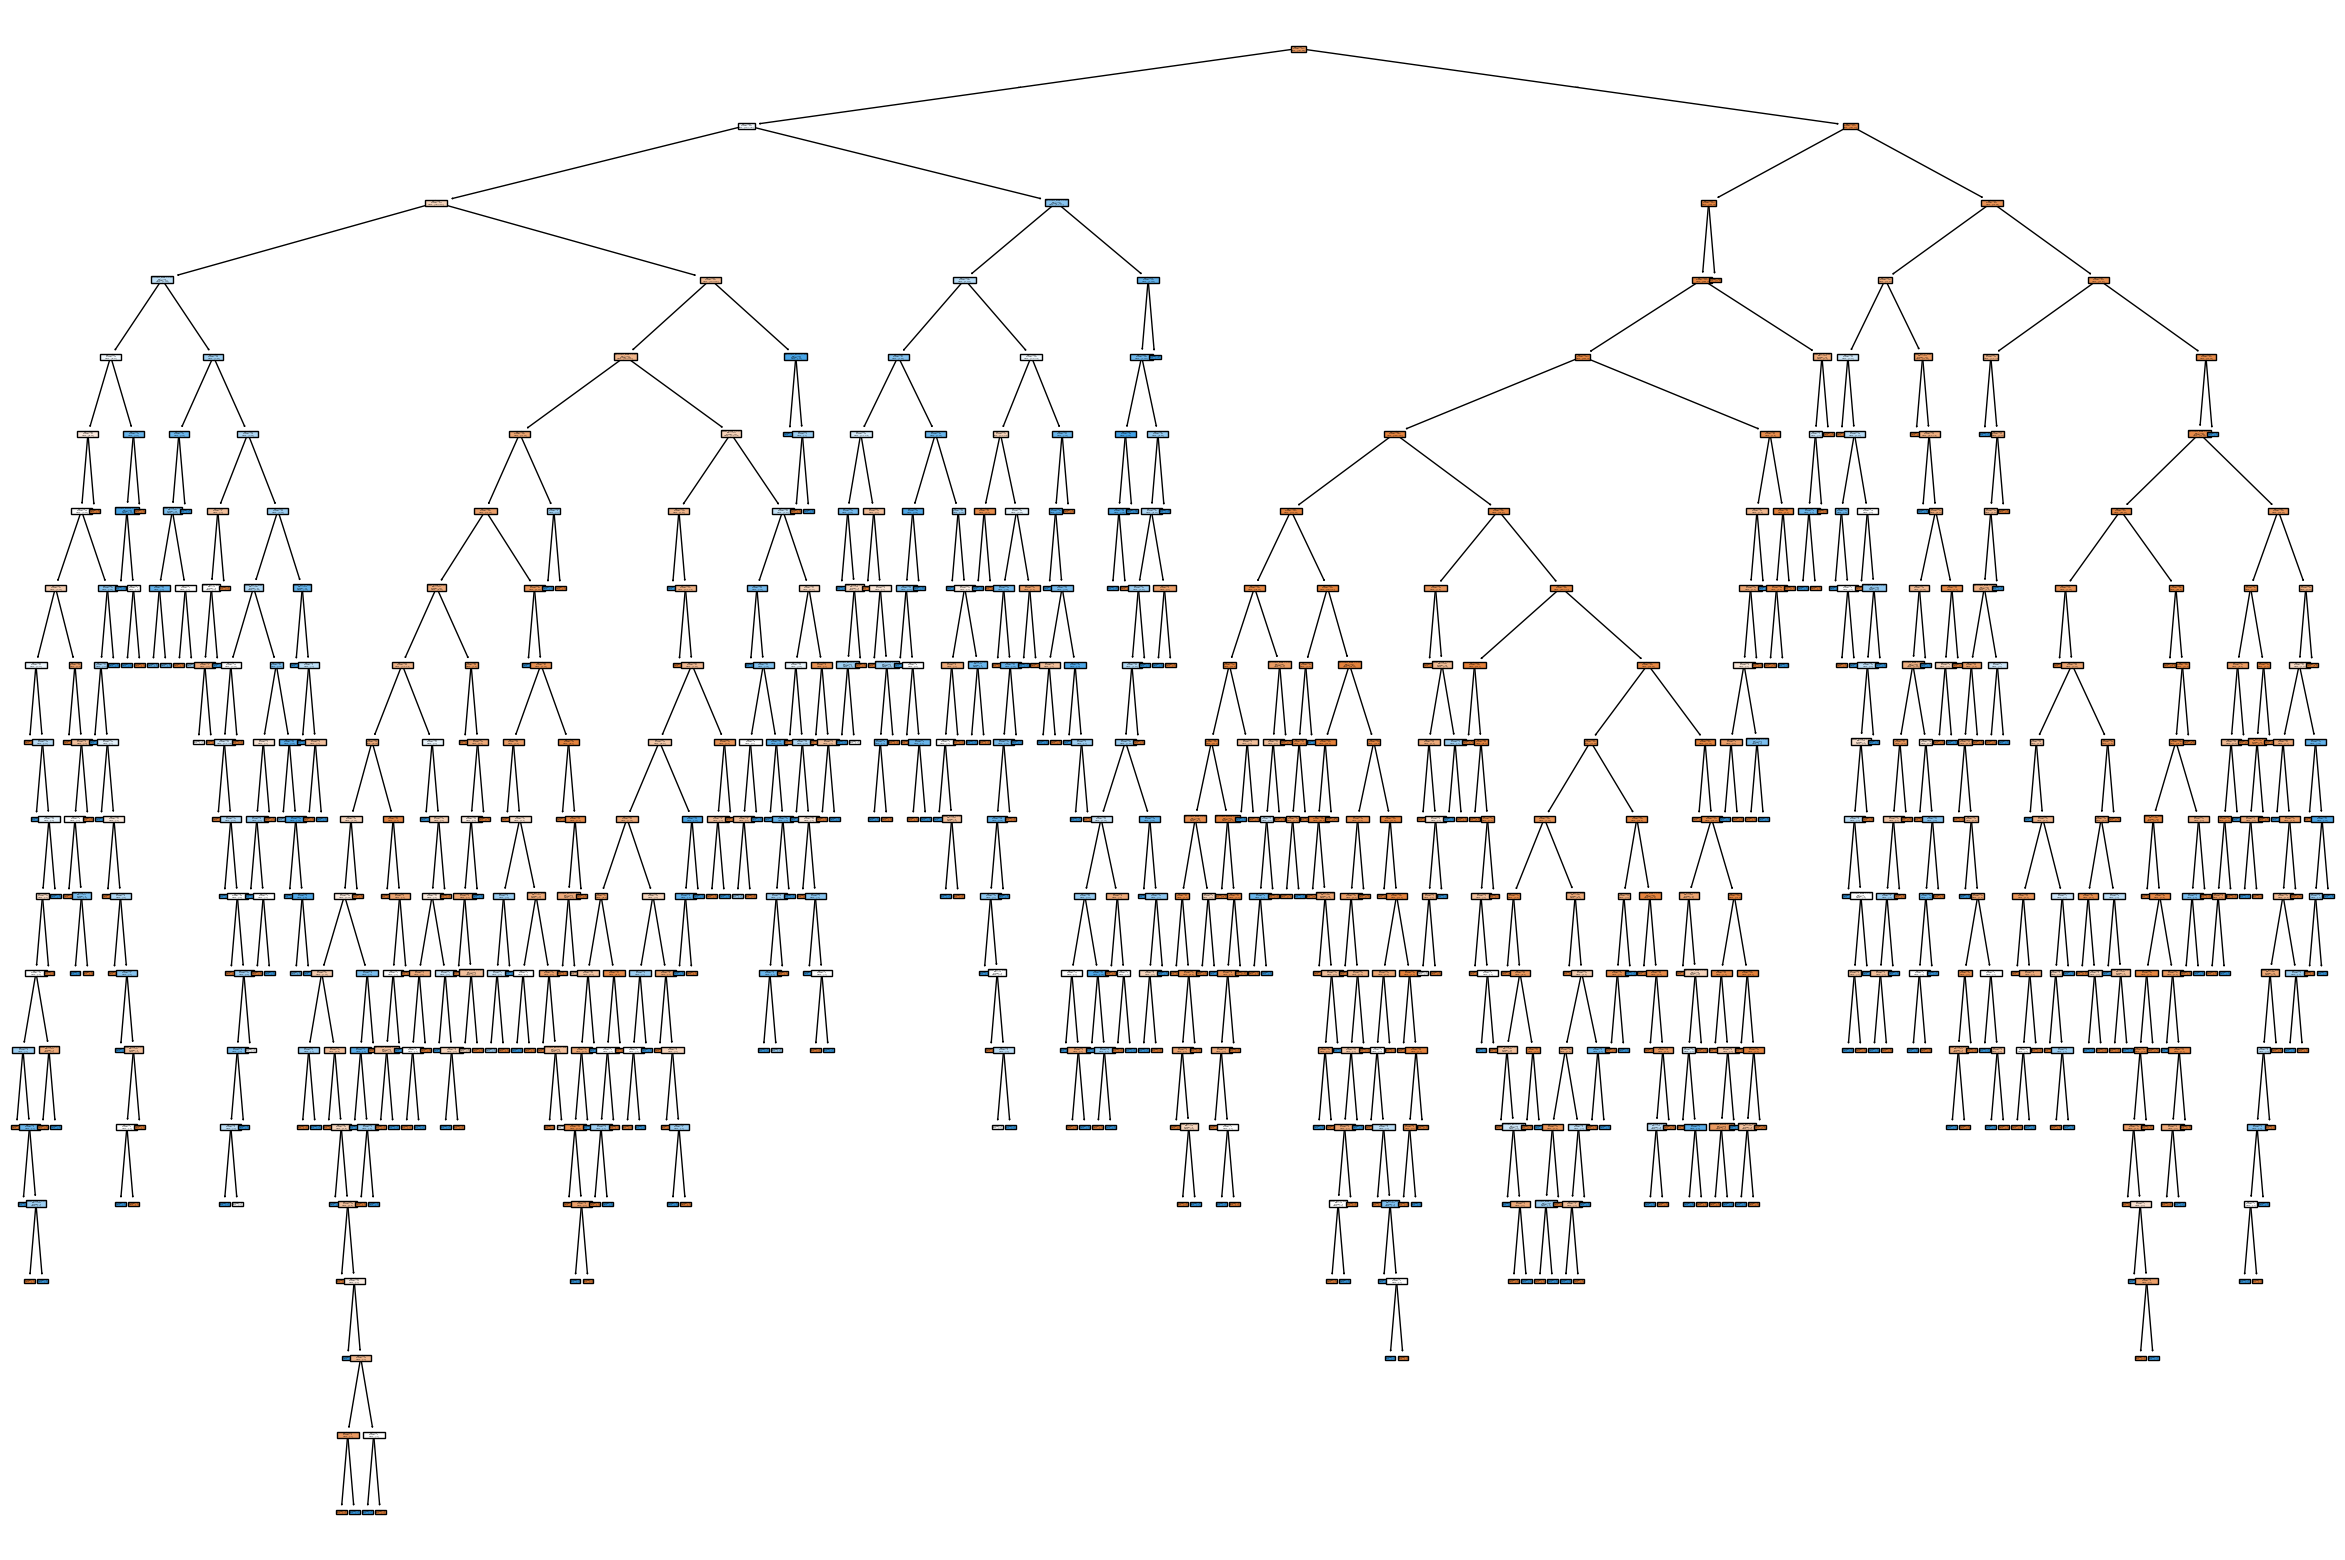

In [90]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30, 20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

**Random Forest algoritmi**

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       849
           1       0.80      0.81      0.81       163

    accuracy                           0.94      1012
   macro avg       0.88      0.89      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Model aniqligi: 0.9377470355731226


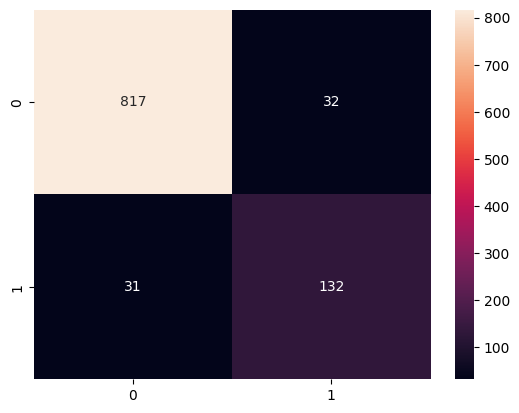

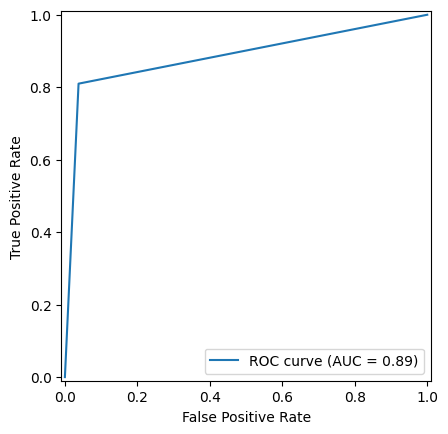

In [91]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_mat =metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

**XGBoost**

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       849
           1       0.82      0.77      0.79       163

    accuracy                           0.93      1012
   macro avg       0.89      0.87      0.88      1012
weighted avg       0.93      0.93      0.93      1012

Model aniqligi: 0.9347826086956522


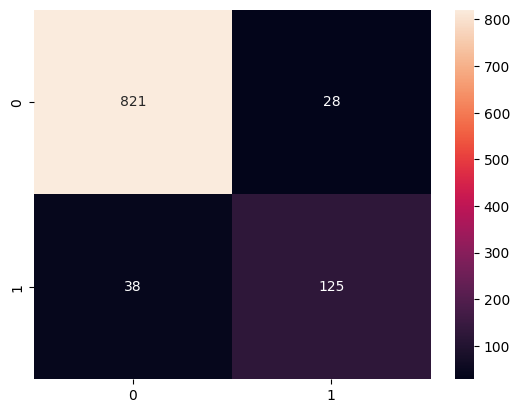

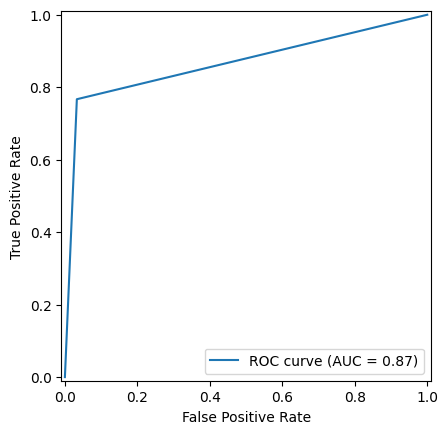

In [92]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test, y_pred))

#confusion matrix
conf_mat =metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()